# Ataberk's CS 210 Project: Spotify Analysis

The Primary objective of this project is to conduct a thorough analysis of my own Spotify listening habits, focusing on the data collected from December 2022 to December 2023. This investigation includes identifying the most played tracks for each season, analyzing monthly listening time, determining the top 10 genres within my preferred playlist. Moveover, i will also analyze my music listening frequency by the hour of the day. The employment of data visualization and statistical analysis will demonstrate comprehensive understanding of my personal Spotify data.

## **Dataset used for this project**

This project utilizes two main sources of data: .json files provided by Spotify and csv files of specific playlist.

Streaming History files includes:

* Artist Name
* Track Name
* Minutes played
* endTime

Search Quary files includes:

* Platform

Playlist file includes:

* Track Name
* Artist Name
* Album Name
* Added Date

CSV files includes:

* Genres
* Parent Genres
* Time

# Import Necessary Libraries

In [166]:
import pandas as pd
import json
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Open and Load Data Files

In [167]:
file_path1 = '/Users/thedodo/Desktop/Spotify Account Data/StreamingHistory0.json'

with open(file_path1, 'r') as file:
    streaming_data = json.load(file)
    
df_streaming = pd.DataFrame(streaming_data)

df_streaming['endTime'] = pd.to_datetime(df_streaming['endTime'])
df_streaming['secondsPlayed'] = df_streaming['msPlayed'] / 1000
df_streaming.drop('msPlayed', axis=1, inplace=True)

file_path2 = '/Users/thedodo/Desktop/Spotify Account Data/StreamingHistory1.json'

with open(file_path2, 'r') as file:
    second_streaming_data = json.load(file)
    
df_second_streaming = pd.DataFrame(second_streaming_data)

df_second_streaming['endTime'] = pd.to_datetime(df_second_streaming['endTime'])
df_second_streaming['secondsPlayed'] = df_second_streaming['msPlayed'] / 1000
df_second_streaming.drop('msPlayed', axis=1, inplace=True)

combined_df = pd.concat([df_streaming, df_second_streaming], ignore_index=True)

grouped_data = combined_df.groupby(['artistName', 'trackName'])['secondsPlayed'].sum()

grouped_data_minutes = grouped_data / 60

sorted_data = grouped_data_minutes.sort_values(ascending=False)

top_tracks_df = sorted_data.reset_index()
top_tracks_df.columns = ['Artist Name', 'Track Name', 'Minutes Played']

print(top_tracks_df.head(10))


            Artist Name                                         Track Name  \
0  ASMR Rain Recordings                        2 Hours of Thunder and Rain   
1                   &ME                                 The Rapture Pt.III   
2   Gustavo Santaolalla                                           Unbroken   
3  Relaxing White Noise  Sleep Sounds Rain & Thunderstorm White Noise 8...   
4           Max Richter                          On the Nature of Daylight   
5             Balmorhea                                        Remembrance   
6                Krobak        It's Snowing Like It's the End of the World   
7        Zakes Bantwini                                              Osama   
8          Mark Eliyahu                                            Endless   
9            Ruby Haunt                                  Answering Machine   

   Minutes Played  
0     3365.073983  
1      310.620700  
2      227.302800  
3      211.265983  
4      172.188633  
5      165.933150  
6

# Checking for Missing Values

In [168]:
missing_values_combined = combined_df.isnull().sum()
print("Missing values in combined DataFrame:")
print(missing_values_combined)

Missing values in combined DataFrame:
endTime          0
artistName       0
trackName        0
secondsPlayed    0
dtype: int64


# Display the Summary of the Dataset

In [169]:
combined_df.info()

combined_df.columns.tolist()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19241 entries, 0 to 19240
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   endTime        19241 non-null  datetime64[ns]
 1   artistName     19241 non-null  object        
 2   trackName      19241 non-null  object        
 3   secondsPlayed  19241 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 601.4+ KB


['endTime', 'artistName', 'trackName', 'secondsPlayed']

# Most Played Tracks in Spring

In [170]:
spring_months = df_streaming[df_streaming['endTime'].dt.month.isin([3, 4, 5])]

spring_top_tracks = spring_months.groupby(['artistName', 'trackName'])['secondsPlayed'].sum()

spring_top_tracks_minutes = spring_top_tracks / 60

sorted_spring_tracks = spring_top_tracks_minutes.sort_values(ascending=False)

top_spring_tracks_df = sorted_spring_tracks.reset_index()
top_spring_tracks_df.columns = ['Artist Name', 'Track Name', 'Minutes Played']

print(top_spring_tracks_df.head(10))


            Artist Name                                         Track Name  \
0  ASMR Rain Recordings                        2 Hours of Thunder and Rain   
1   Gustavo Santaolalla                                           Unbroken   
2                Ninedo  Hotline Bling (Billie Ver.) - Instrumental End...   
3            Sezen Aksu                                    Unuttun mu Beni   
4         Levent Yüksel                                              Zalim   
5   Gustavo Santaolalla                                  Beyond Desolation   
6   Gustavo Santaolalla                             All Gone (The Promise)   
7        Zakes Bantwini                                              Osama   
8           Max Richter                          On the Nature of Daylight   
9        Parra for Cuva                                   Out Here with Us   

   Minutes Played  
0     1359.009617  
1      118.042983  
2      106.631533  
3       92.683933  
4       65.261300  
5       51.038883  
6

# Graphical Analysis of Track Playcounts for Spring

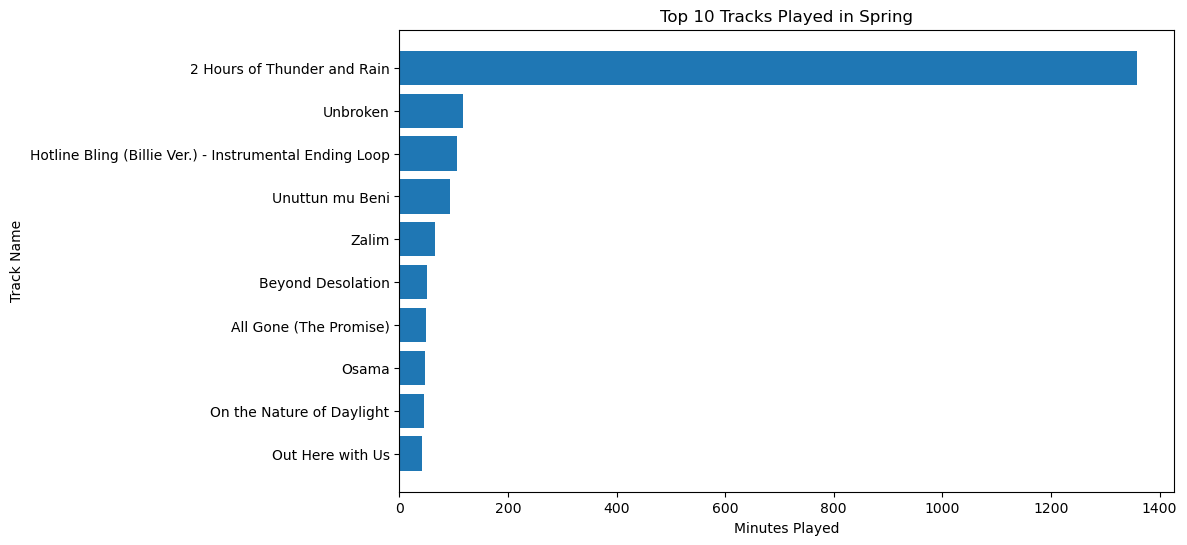

In [171]:
top_10_spring_tracks = top_spring_tracks_df.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_10_spring_tracks['Track Name'], top_10_spring_tracks['Minutes Played'])
plt.xlabel('Minutes Played')
plt.ylabel('Track Name')
plt.title('Top 10 Tracks Played in Spring')
plt.gca().invert_yaxis() 
plt.show()

# Most Played Tracks in Winter

In [172]:
winter_months = df_streaming[df_streaming['endTime'].dt.month.isin([12, 1, 2])]

winter_top_tracks = winter_months.groupby(['artistName', 'trackName'])['secondsPlayed'].sum()

winter_top_tracks_minutes = winter_top_tracks / 60

sorted_winter_tracks = winter_top_tracks_minutes.sort_values(ascending=False)

top_winter_tracks_df = sorted_winter_tracks.reset_index()
top_winter_tracks_df.columns = ['Artist Name', 'Track Name', 'Minutes Played']

print(top_winter_tracks_df.head(10))

            Artist Name                                         Track Name  \
0  ASMR Rain Recordings                        2 Hours of Thunder and Rain   
1  Relaxing White Noise  Sleep Sounds Rain & Thunderstorm White Noise 8...   
2        Sufjan Stevens                                  Visions of Gideon   
3           Ebru Gündeş                                     Ölümsüz Aşklar   
4          Metro Boomin  Superhero (Heroes & Villains) [with Future & C...   
5            Mert Demir                                       Antidepresan   
6          Metro Boomin                         On Time (with John Legend)   
7      Scarlet Pleasure                                        What A Life   
8          Metro Boomin             Creepin' (with The Weeknd & 21 Savage)   
9                 Drake                                        Spin Bout U   

   Minutes Played  
0     2006.064367  
1      211.233283  
2       55.221033  
3       41.825250  
4       41.484967  
5       41.457883  
6

# Graphical Analysis of Track Playcounts for Winter

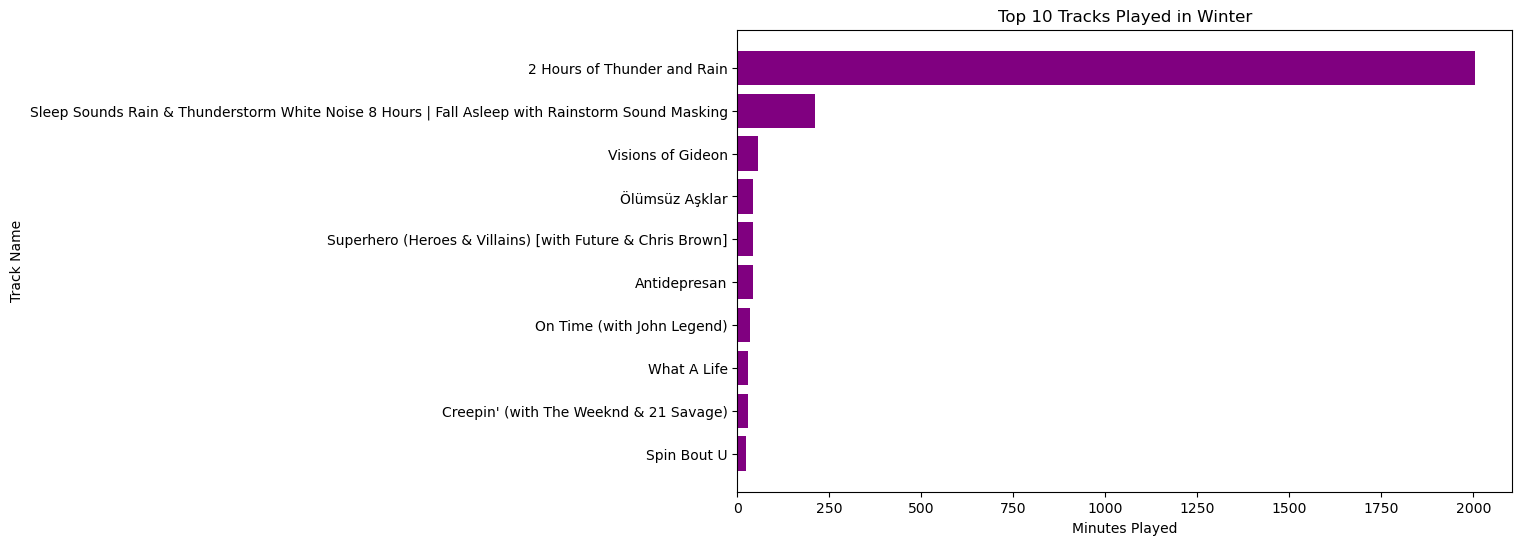

In [203]:
top_10_winter_tracks = top_winter_tracks_df.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_10_winter_tracks['Track Name'], top_10_winter_tracks['Minutes Played'], color='purple')
plt.xlabel('Minutes Played')
plt.ylabel('Track Name')
plt.title('Top 10 Tracks Played in Winter')
plt.gca().invert_yaxis()  
plt.show()

# Most Played Tracks in Summer

In [174]:
summer_months = df_streaming[df_streaming['endTime'].dt.month.isin([6, 7, 8])]

summer_top_tracks = summer_months.groupby(['artistName', 'trackName'])['secondsPlayed'].sum()

summer_top_tracks_minutes = summer_top_tracks / 60

sorted_summer_tracks = summer_top_tracks_minutes.sort_values(ascending=False)

top_summer_tracks_df = sorted_summer_tracks.reset_index()
top_summer_tracks_df.columns = ['Artist Name', 'Track Name', 'Minutes Played']

print(top_summer_tracks_df.head(10))


            Artist Name                 Track Name  Minutes Played
0           Max Richter  On the Nature of Daylight       71.280033
1             onur arda      la lecon particuliere       70.462950
2                Motive                    RANDEVU       63.455633
3                 Joezi                  7 Seconds       57.008783
4  ASMR Rain Recordings        Soft and Quiet Rain       54.964033
5             Balmorhea                Remembrance       53.599500
6               Worakls                      Porto       49.333333
7                Motive                       GANG       47.269800
8              Semicenk             Pişman Değilim       46.876267
9            Ruby Haunt          Answering Machine       46.707417


# Graphical Analysis of Track Playcounts for Summer

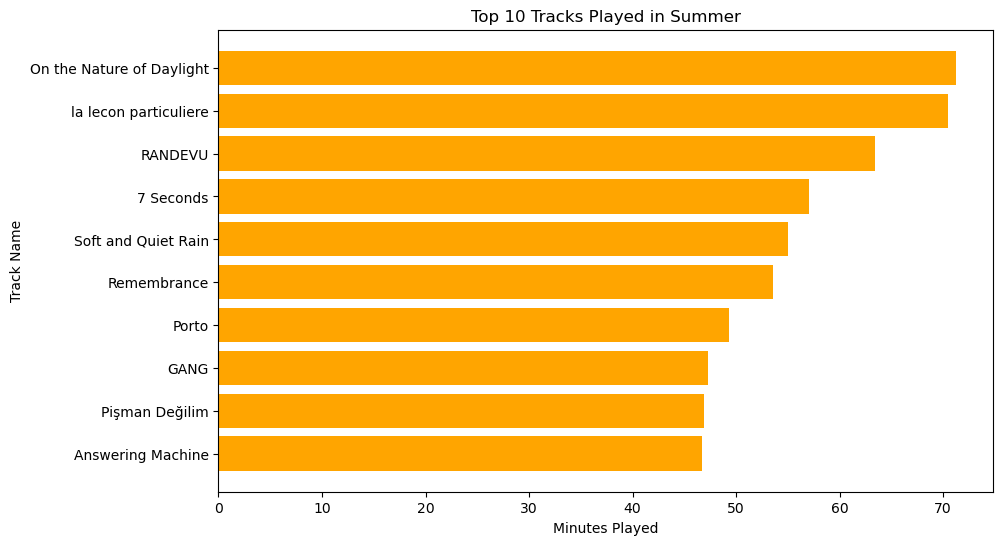

In [202]:
top_10_summer_tracks = top_summer_tracks_df.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_10_summer_tracks['Track Name'], top_10_summer_tracks['Minutes Played'], color='orange')
plt.xlabel('Minutes Played')
plt.ylabel('Track Name')
plt.title('Top 10 Tracks Played in Summer')
plt.gca().invert_yaxis()  
plt.show()

# Most Played Tracks in Fall

In [176]:
fall_months = combined_df[combined_df['endTime'].dt.month.isin([9, 10, 11])]

fall_top_tracks = fall_months.groupby(['artistName', 'trackName'])['secondsPlayed'].sum()

fall_top_tracks_minutes = fall_top_tracks / 60

sorted_fall_tracks = fall_top_tracks_minutes.sort_values(ascending=False)

top_fall_tracks_df = sorted_fall_tracks.reset_index()
top_fall_tracks_df.columns = ['Artist Name', 'Track Name', 'Minutes Played']

print(top_fall_tracks_df.head(10)) 


         Artist Name                                   Track Name  \
0                &ME                           The Rapture Pt.III   
1             Krobak  It's Snowing Like It's the End of the World   
2       Mark Eliyahu                                      Endless   
3       Melike Şahin                                  Diva Yorgun   
4             Kalben                                       Sadece   
5            Valeron                                        Anlar   
6        Evdeki Saat                                       Sustum   
7          Balmorhea                                  Remembrance   
8        Kaan Boşnak                              Bırakma Kendini   
9  Cihan Mürtezaoğlu                             Bir Beyaz Orkide   

   Minutes Played  
0      266.792450  
1      155.051800  
2      133.594233  
3      112.434117  
4      106.123083  
5      105.259433  
6       91.333650  
7       90.409950  
8       89.712683  
9       83.238200  


# Graphical Analysis of Track Playcounts for Fall

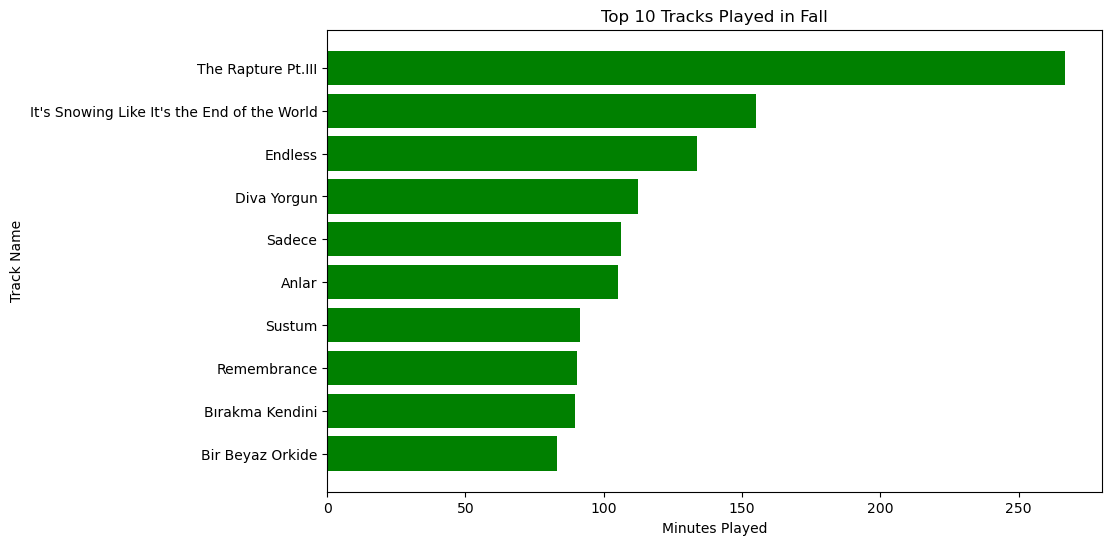

In [204]:
top_10_fall_tracks = top_fall_tracks_df.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_10_fall_tracks['Track Name'], top_10_fall_tracks['Minutes Played'], color='green')
plt.xlabel('Minutes Played')
plt.ylabel('Track Name')
plt.title('Top 10 Tracks Played in Fall')
plt.gca().invert_yaxis() 
plt.show()

# Monthly Listening Time

In [178]:
combined_df['endTime'] = pd.to_datetime(combined_df['endTime'])
combined_df['month_name'] = combined_df['endTime'].dt.month_name()

monthly_listening = combined_df.groupby('month_name')['secondsPlayed'].sum() / 60

months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
monthly_listening_minutes = monthly_listening.reindex(months_order)

total_listening_time = monthly_listening_minutes.sum()

monthly_listening_minutes.loc['Total'] = total_listening_time

print(monthly_listening_minutes)


month_name
January       3112.764067
February      1820.062233
March         3345.943333
April         3818.204233
May           2586.271400
June          2651.439767
July          3425.750500
August        4203.192633
September     3972.607017
October       5889.579600
November      5916.766283
December      2868.398233
Total        43610.979300
Name: secondsPlayed, dtype: float64


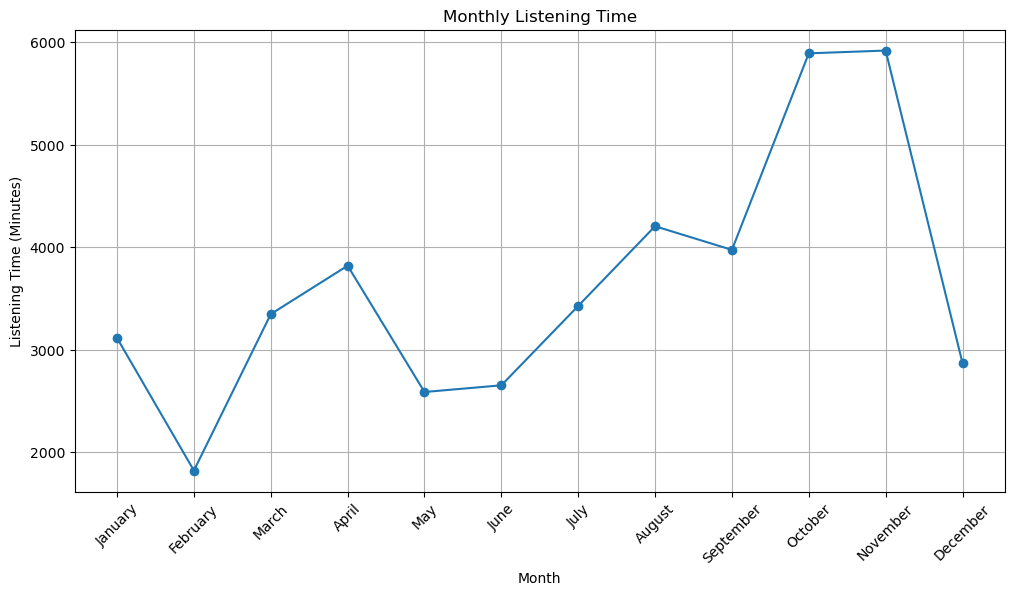

In [200]:
combined_df['endTime'] = pd.to_datetime(combined_df['endTime'])
combined_df['month_name'] = combined_df['endTime'].dt.month_name()

monthly_listening = combined_df.groupby('month_name')['secondsPlayed'].sum() / 60

months_order = ['January', 'February', 'March', 'April', 'May', 'June', 
                'July', 'August', 'September', 'October', 'November', 'December']
monthly_listening_minutes = monthly_listening.reindex(months_order)

plt.figure(figsize=(12, 6))
monthly_listening_minutes.plot(kind='line', marker='o')
plt.title('Monthly Listening Time')
plt.xlabel('Month')
plt.ylabel('Listening Time (Minutes)')
plt.xticks(ticks=range(len(months_order)), labels=months_order, rotation=45)
plt.grid(True)
plt.show()


In [180]:
artist_playtime = combined_df.groupby('artistName')['secondsPlayed'].sum()

artist_playtime_hours = artist_playtime / 3600

sorted_artist = artist_playtime_hours.sort_values(ascending=False)

print(sorted_artist.head(10))

artistName
ASMR Rain Recordings    57.184063
Ramin Djawadi           13.012904
Gustavo Santaolalla     11.821067
Hans Zimmer             10.322351
Metro Boomin             9.104686
Motive                   8.984079
Sezen Aksu               7.741502
Yalın                    7.712897
Drake                    7.413229
Ash                      7.083905
Name: secondsPlayed, dtype: float64


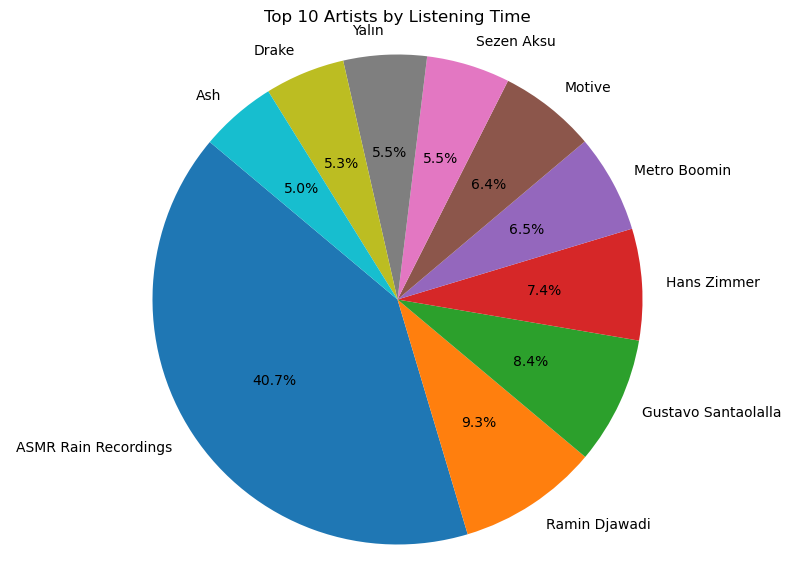

In [205]:
artist_playtime = combined_df.groupby('artistName')['secondsPlayed'].sum()

artist_playtime_hours = artist_playtime / 3600

sorted_artist = artist_playtime_hours.sort_values(ascending=False)

top_artists = sorted_artist.head(10)

plt.figure(figsize=(10, 7))
plt.pie(top_artists, labels=top_artists.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title('Top 10 Artists by Listening Time')
plt.show()


In [182]:
# Statistical summary of numerical columns
print(combined_df.describe())

                             endTime  secondsPlayed
count                          19241   19241.000000
mean   2023-07-12 16:28:54.864092160     135.993907
min              2022-12-11 16:51:00       0.000000
25%              2023-04-18 09:40:00       8.490000
50%              2023-07-29 15:41:00     129.293000
75%              2023-10-14 20:01:00     197.137000
max              2023-12-12 20:52:00    6604.117000
std                              NaN     218.454850


# Analysis of Playlists

In [183]:
playlist_path = '/Users/thedodo/Desktop/Spotify Account Data/Playlist1.json'

with open(playlist_path, 'r') as file:
    playlist_data = json.load(file)

playlists = playlist_data.get('playlists', [])

specified_playlists = ["S", "turkce xxl", "#", "perdurable despondency", "****", "E"]

for playlist in playlists:
    playlist_name = playlist.get('name', 'Unknown Playlist')
    if playlist_name in specified_playlists:
        print(f"Playlist: {playlist_name}")

        for item in playlist.get('items', []):
            track_info = item.get('track', {})
            track_name = track_info.get('trackName', 'Unknown Track')
            artist_name = track_info.get('artistName', 'Unknown Artist')

            print(f"  Track: {track_name}, Artist: {artist_name}")

        print("\n---\n")


Playlist: #
  Track: Les mots bleus, Artist: Johan Papaconstantino
  Track: Can't You See, Artist: Ilkan Gunuc
  Track: Trop beau, Artist: Crisologo
  Track: Le temps est bon, Artist: Bon Entendeur
  Track: Canopée, Artist: Polo & Pan
  Track: Won't Forget You (Edit), Artist: Shouse
  Track: Possédé, Artist: Emma Peters
  Track: Notramourémor?, Artist: Crisologo
  Track: Crazy - Nôze Remix, Artist: Ornette
  Track: Atlas, Artist: Lane 8
  Track: Clandestina, Artist: FILV
  Track: L'amour comme à 16 ans, Artist: Bon Entendeur
  Track: La clé des champs, Artist: NTO
  Track: Deus, Artist: HVOB
  Track: Mosaïque, Artist: Ash
  Track: Lost Gravity, Artist: Tinlicker
  Track: Giorgio by Moroder, Artist: Daft Punk
  Track: Airplane Lesson, Artist: Stereoclip
  Track: Invisible, Artist: NTO
  Track: Crimewave, Artist: Crystal Castles
  Track: Light, Artist: Ash
  Track: Oasis, Artist: Arman Cekin
  Track: Senses, Artist: Ash
  Track: Night, Artist: Crisologo
  Track: White Desert, Artist: Ash

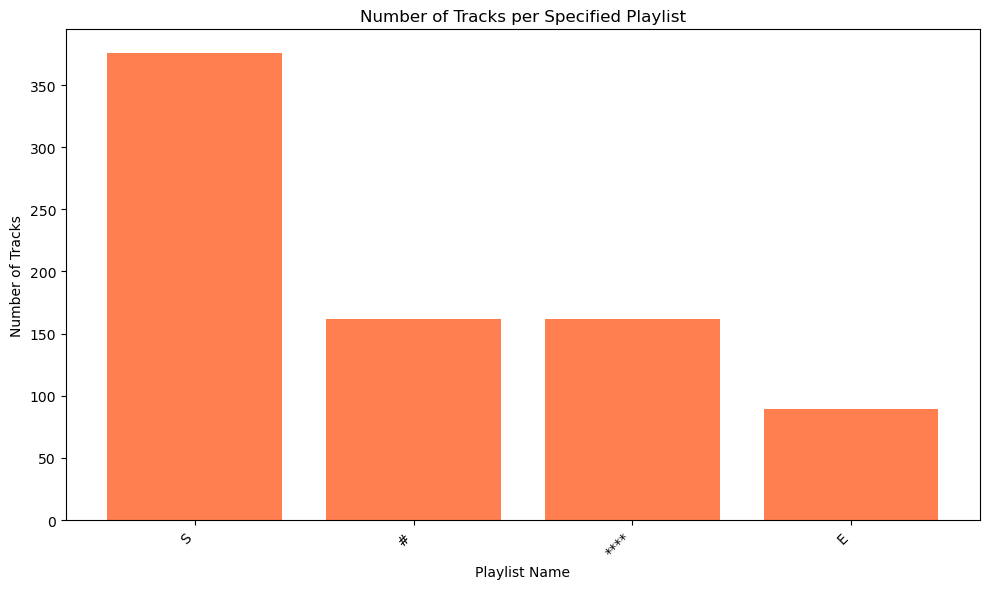

In [184]:

specified_playlists = ["S", "turkce xxl", "#", "perdurable despondency", "****", "E"]

filtered_playlist_counts = {playlist.get('name', 'Unknown Playlist'): len(playlist.get('items', [])) 
                            for playlist in playlists if playlist.get('name', 'Unknown Playlist') in specified_playlists}

sorted_filtered_playlists = sorted(filtered_playlist_counts.items(), key=lambda x: x[1], reverse=True)

filtered_playlist_names, filtered_track_counts = zip(*sorted_filtered_playlists)

plt.figure(figsize=(10, 6))
plt.bar(filtered_playlist_names, filtered_track_counts, color='coral')
plt.xlabel('Playlist Name')
plt.ylabel('Number of Tracks')
plt.title('Number of Tracks per Specified Playlist')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


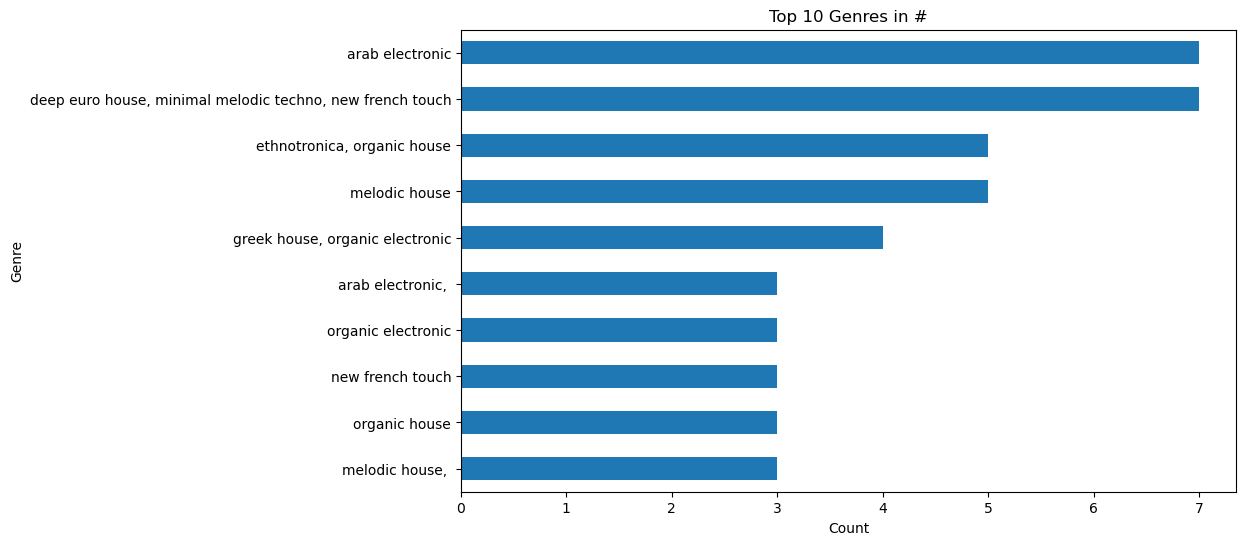

In [206]:
import pandas as pd
import matplotlib.pyplot as plt

file_path_csv = '/Users/thedodo/Desktop/210 Project/#.csv'

try:
    df = pd.read_csv(file_path_csv)

    genre_column_name = 'Genres'
    
    if genre_column_name in df.columns:        
        genre_counts = df[genre_column_name].value_counts()

        top_n = 10 
        top_genres = genre_counts.head(top_n)

        plt.figure(figsize=(10, 6))
        top_genres.plot(kind='barh')
        plt.xlabel('Count')
        plt.ylabel('Genre')
        plt.title(f'Top {top_n} Genres in #')
        plt.gca().invert_yaxis() 
        plt.show()

    else:
        print(f"The file does not contain a column named '{genre_column_name}'.")

except Exception as e:
    print(f"Error loading file: {e}")


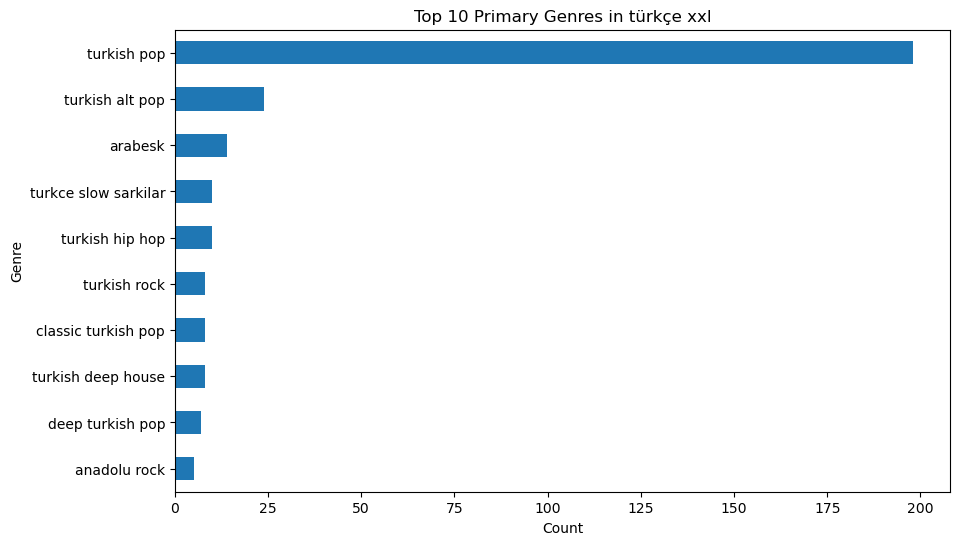

In [186]:
import pandas as pd
import matplotlib.pyplot as plt

file_path_csv = '/Users/thedodo/Desktop/210 Project/türkçe xxl.csv'

try:
    df = pd.read_csv(file_path_csv)

    genre_column_name = 'Genres'
    
    if genre_column_name in df.columns:
        df['primary_genre'] = df[genre_column_name].apply(lambda x: x.split(',')[0] if isinstance(x, str) else x)

        genre_counts = df['primary_genre'].value_counts()

        top_n = 10 
        top_genres = genre_counts.head(top_n)

        plt.figure(figsize=(10, 6))
        top_genres.plot(kind='barh')
        plt.xlabel('Count')
        plt.ylabel('Genre')
        plt.title(f'Top {top_n} Primary Genres in türkçe xxl')
        plt.gca().invert_yaxis()  
        plt.show()

    else:
        print(f"The file does not contain a column named '{genre_column_name}'.")

except Exception as e:
    print(f"Error loading file: {e}")


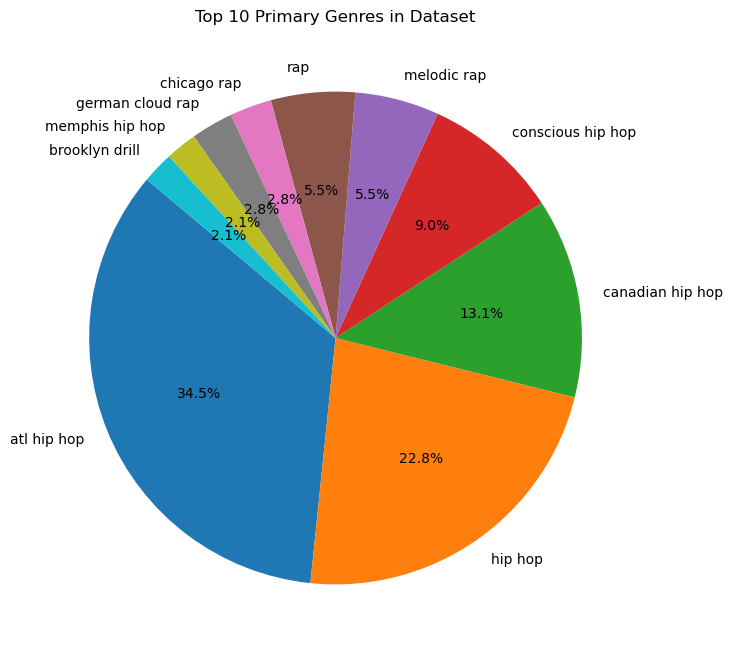

In [207]:
file_path_csv = '/Users/thedodo/Desktop/210 Project/____.csv'

try:
    df = pd.read_csv(file_path_csv)

    genre_column_name = 'Genres'
    
    if genre_column_name in df.columns:        
        df['primary_genre'] = df[genre_column_name].apply(lambda x: x.split(',')[0] if isinstance(x, str) else x)

        genre_counts = df['primary_genre'].value_counts()

        top_n = 10  
        top_genres = genre_counts.head(top_n)

        plt.figure(figsize=(8, 8))
        top_genres.plot(kind='pie', autopct='%1.1f%%', startangle=140)
        plt.title(f'Top {top_n} Primary Genres in Dataset')
        plt.ylabel('')  
        plt.show()

    else:
        print(f"The file does not contain a column named '{genre_column_name}'.")

except Exception as e:
    print(f"Error loading file: {e}")


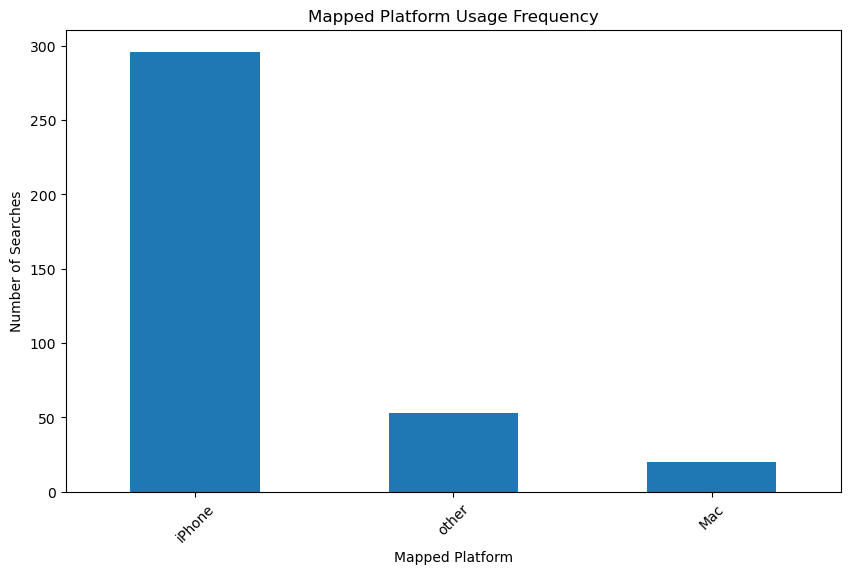

In [208]:
import pandas as pd
import matplotlib.pyplot as plt

def map_device_type(device_type):
    if 'IPHONE' in device_type or 'IPHONE_ARM64' in device_type:
        return 'iPhone'
    elif 'OSX_X86_64' in device_type:
        return 'Mac'
    else:
        return 'other'

file_path = '/Users/thedodo/Desktop/Spotify Account Data/SearchQueries.json'
with open(file_path, 'r') as file:
    search_data = json.load(file)

df_search = pd.DataFrame(search_data)

df_search['platform_mapped'] = df_search['platform'].apply(map_device_type)

platform_counts = df_search['platform_mapped'].value_counts()

plt.figure(figsize=(10, 6))
platform_counts.plot(kind='bar')
plt.title('Mapped Platform Usage Frequency')
plt.xlabel('Mapped Platform')
plt.ylabel('Number of Searches')
plt.xticks(rotation=45)
plt.show()


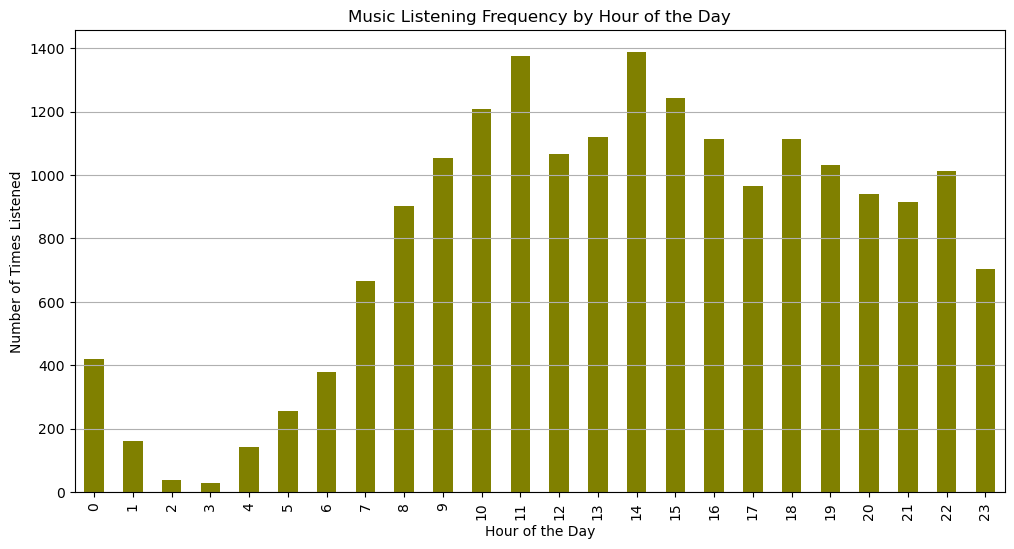

In [209]:
import matplotlib.pyplot as plt


combined_df['hour'] = combined_df['endTime'].dt.hour

hourly_counts_combined = combined_df['hour'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
hourly_counts_combined.plot(kind='bar', color='olive')
plt.title('Music Listening Frequency by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Times Listened')
plt.xticks(range(24), range(24))
plt.grid(axis='y')
plt.show()
